In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
snsx = pd.read_csv('SENSEX.csv')
snsx

,Year,Open,High,Low,Close
1980,NaN,NaN,NaN,148.25,NaN
1981,NaN,NaN,NaN,227.72,NaN
1982,NaN,NaN,NaN,235.83,NaN
1983,NaN,NaN,NaN,252.92,NaN
1984,NaN,NaN,NaN,271.87,NaN
1985,NaN,NaN,NaN,527.36,NaN
1986,NaN,NaN,NaN,524.45,NaN
1987,NaN,NaN,NaN,442.17,NaN
1988,NaN,NaN,NaN,666.26,NaN
1989,NaN,NaN,NaN,778.64,NaN


In [ ]:
bse500 = pd.read_csv('BSE500.csv')

In [ ]:
bse500 = bse500["Low"]
bse500 = bse500.reset_index().rename(columns={'index': 'Year', "Low": "Price"})
bse500['Year'] = pd.to_datetime(bse500['Year'], format='%Y')
bse500['Year'] = bse500['Year'].dt.year

# Set the 'Year' column as the index
bse500.set_index('Year', inplace=True)

# Calculate the yearly returns based on the closing price
bse500['returns'] = bse500['Price'].pct_change()*100

# Fill NaN values in returns with 0
bse500['returns'] = bse500['returns'].fillna(0)

bse500.head()

In [59]:
snsx = snsx["Low"]
snsx = snsx.reset_index().rename(columns={'index': 'Year', "Low": "Price"})
snsx['Year'] = pd.to_datetime(snsx['Year'], format='%Y')
snsx['Year'] = snsx['Year'].dt.year

# Set the 'Year' column as the index
snsx.set_index('Year', inplace=True)

# Calculate the yearly returns based on the closing price
snsx['returns'] = snsx['Price'].pct_change()*100
snsx.returns = snsx.returns.fillna(0)
snsx.head()

,Price,returns
Year,,
1980,148.25,NaN
1981,227.72,53.605396
1982,235.83,3.561391
1983,252.92,7.246746
1984,271.87,7.492488


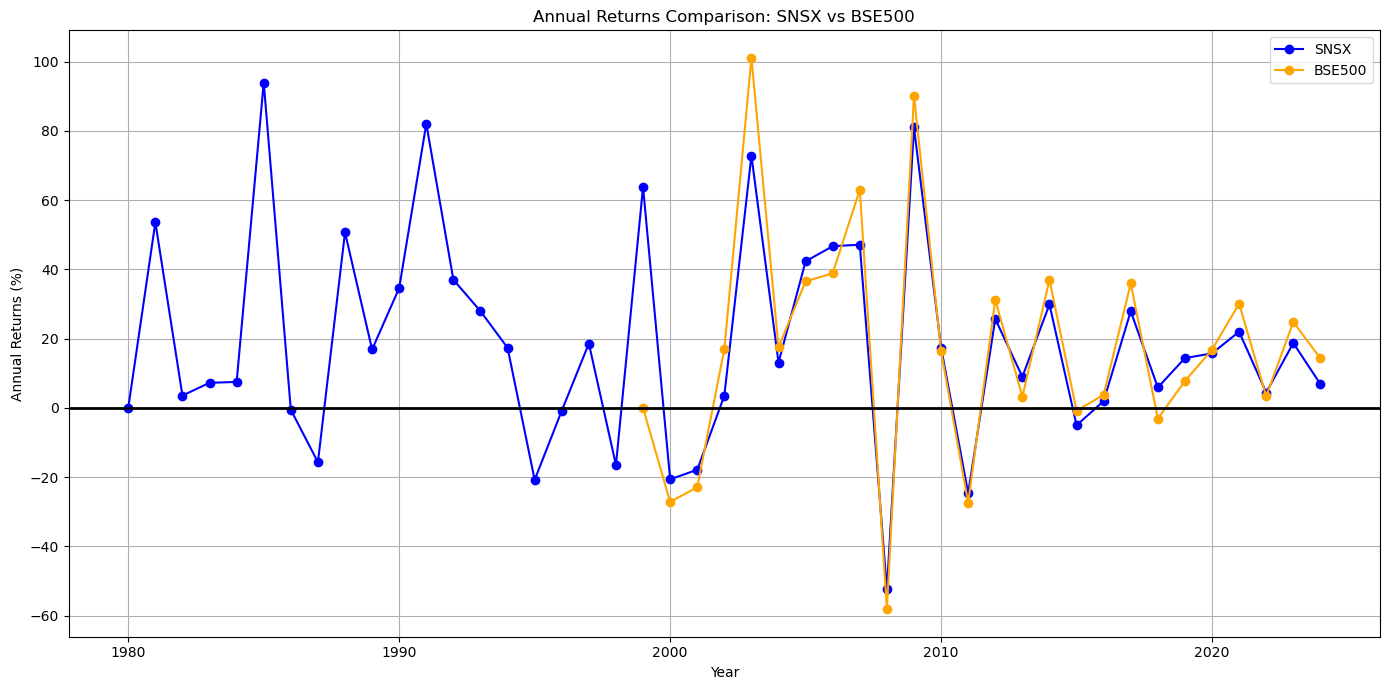

In [87]:
# Plotting annual returns
plt.figure(figsize=(14, 7))

plt.plot(snsx.index, snsx['returns'], marker='o', linestyle='-', color='blue', label='SNSX')
plt.plot(bse500.index, bse500['returns'], marker='o', linestyle='-', color='orange', label='BSE500')
plt.axhline(y=0, color='black', linestyle='-', linewidth=2)

# Adding labels and title
plt.title('Annual Returns Comparison: SNSX vs BSE500')
plt.xlabel('Year')
plt.ylabel('Annual Returns (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


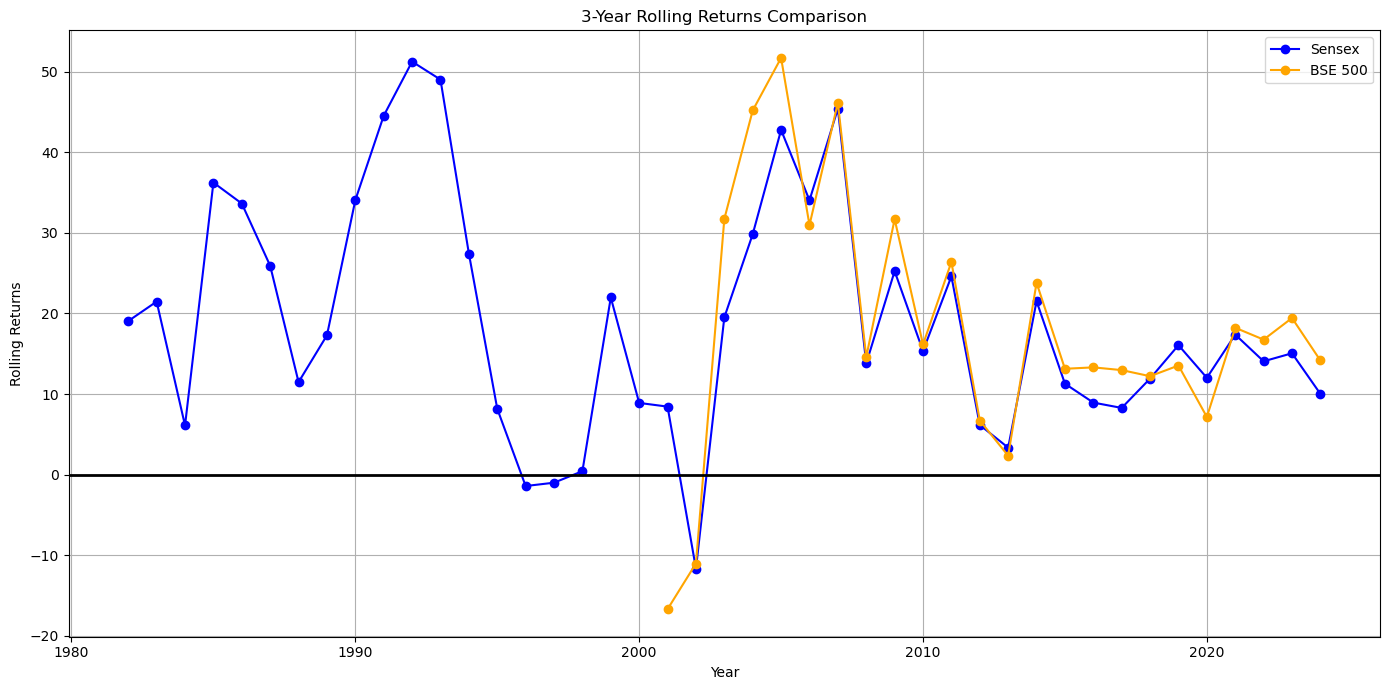

In [96]:
# Calculate the rolling returns
snsx_rolling_3y = snsx['returns'].rolling(window=3).mean()
bse500_rolling_3y = bse500['returns'].rolling(window=3).mean()

# Plot the rolling returns
plt.figure(figsize=(14, 7))
plt.plot(snsx.index, snsx_rolling_3y, marker='o', color = "blue", label='Sensex')
plt.plot(bse500.index, bse500_rolling_3y, marker='o', color='orange', label='BSE 500')

plt.axhline(y=0, color='black', linestyle='-', linewidth=2)

# Adding title and labels
plt.title('3-Year Rolling Returns Comparison')
plt.xlabel('Year')
plt.ylabel('Rolling Returns')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

There has never been a 10 year period, where sensex gave negative returns.
only once, a 5 year period has given negative return and that too was -0.43%

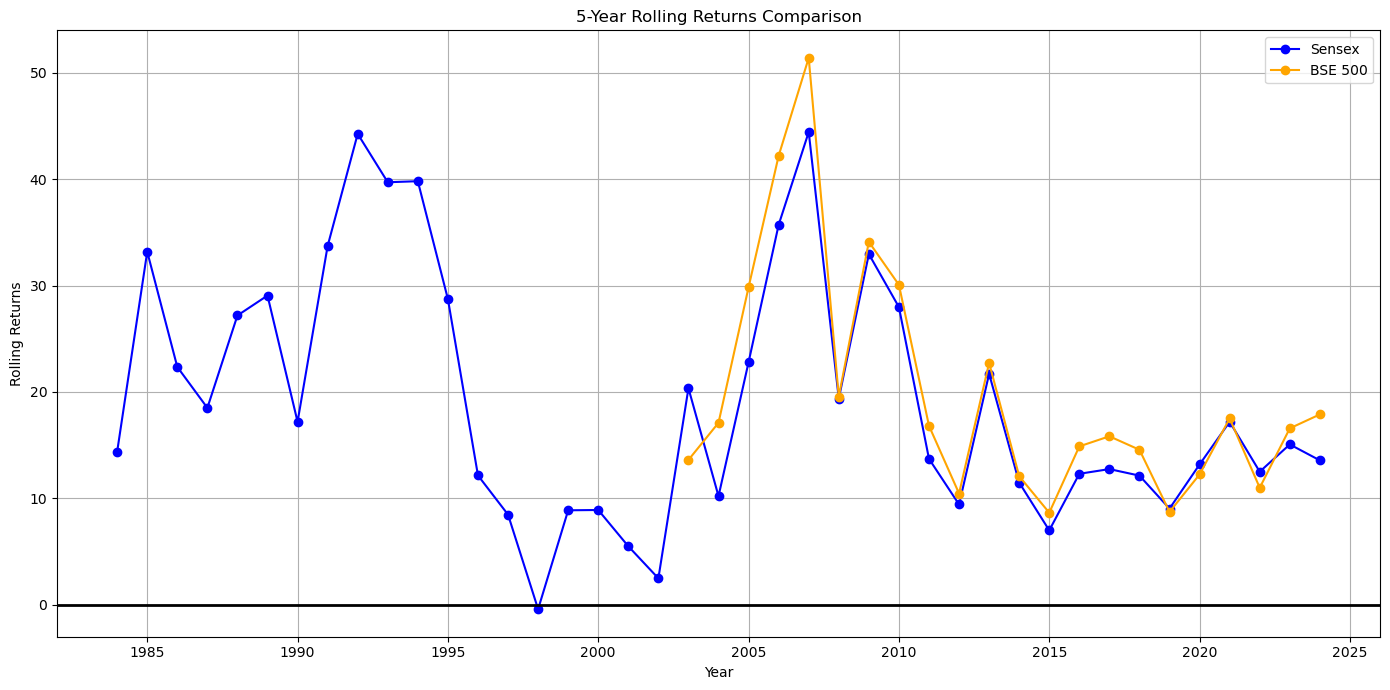

In [97]:
# Calculate the rolling returns
snsx_rolling_5y = snsx['returns'].rolling(window=5).mean()
bse500_rolling_5y = bse500['returns'].rolling(window=5).mean()

# Plot the rolling returns
plt.figure(figsize=(14, 7))
plt.plot(snsx.index, snsx_rolling_5y, marker='o', color = "blue", label='Sensex')
plt.plot(bse500.index, bse500_rolling_5y, marker='o', color='orange', label='BSE 500')

plt.axhline(y=0, color='black', linestyle='-', linewidth=2)

# Adding title and labels
plt.title('5-Year Rolling Returns Comparison')
plt.xlabel('Year')
plt.ylabel('Rolling Returns')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

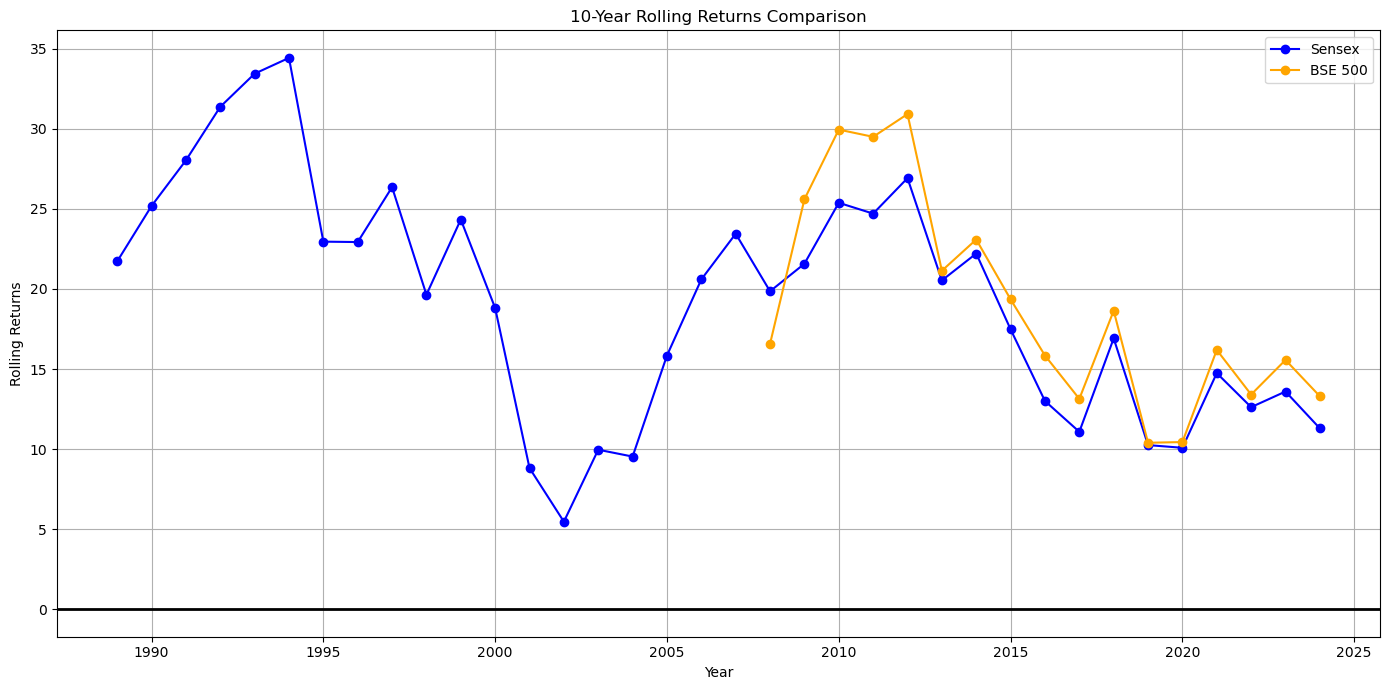

In [98]:
# Calculate the rolling returns
snsx_rolling_10y = snsx['returns'].rolling(window=10).mean()
bse500_rolling_10y = bse500['returns'].rolling(window=10).mean()

# Plot the rolling returns
plt.figure(figsize=(14, 7))
plt.plot(snsx.index, snsx_rolling_10y, marker='o', color = "blue", label='Sensex')
plt.plot(bse500.index, bse500_rolling_10y, marker='o', color='orange', label='BSE 500')

plt.axhline(y=0, color='black', linestyle='-', linewidth=2)

# Adding title and labels
plt.title('10-Year Rolling Returns Comparison')
plt.xlabel('Year')
plt.ylabel('Rolling Returns')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

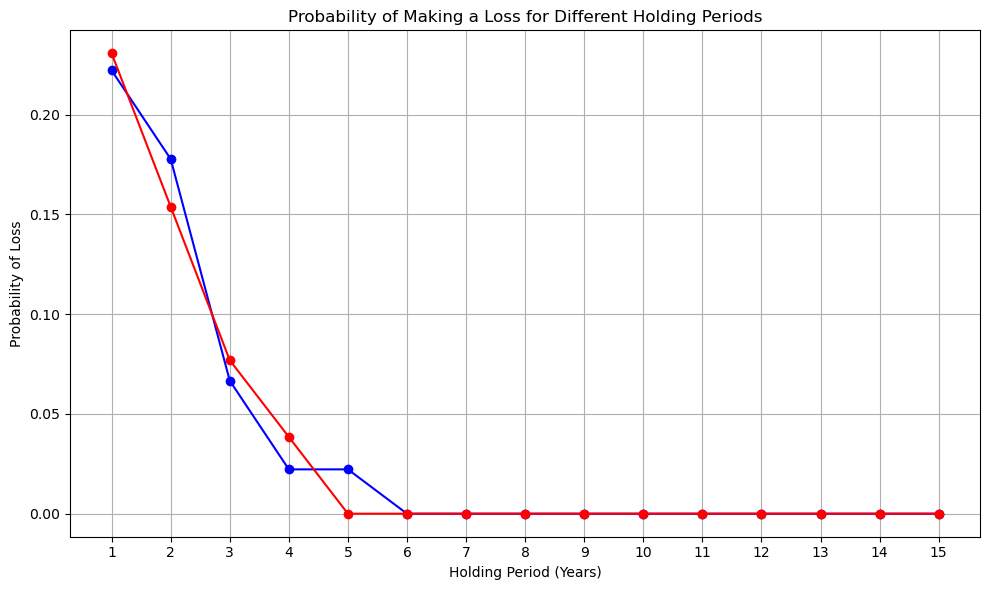

In [100]:
# Calculate the probability of making a loss for different holding periods
holding_periods = range(1, 16)
snsx_probabilities = []
bse500_probabilities = []

for period in holding_periods:
    # Calculate rolling returns
    snsx_rolling_returns = snsx['returns'].rolling(window=period).mean()
    bse500_rolling_returns = bse500['returns'].rolling(window=period).mean()
    
    # Count number of negative rolling returns
    snsx_num_losses = (snsx_rolling_returns < 0).sum()
    bse500_num_losses = (bse500_rolling_returns < 0).sum()
    
    # Calculate probability of loss
    snsx_probability = snsx_num_losses / len(snsx_rolling_returns)
    bse500_probability = bse500_num_losses / len(bse500_rolling_returns)
    
    snsx_probabilities.append(snsx_probability)
    bse500_probabilities.append(bse500_probability)
    
# Plotting the probabilities
plt.figure(figsize=(10, 6))
plt.plot(holding_periods, snsx_probabilities, marker='o', linestyle='-', color='b')
plt.plot(holding_periods, bse500_probabilities, marker='o', linestyle='-', color='r')

# Adding title and labels
plt.title('Probability of Making a Loss for Different Holding Periods')
plt.xlabel('Holding Period (Years)')
plt.ylabel('Probability of Loss')
plt.xticks(holding_periods)
plt.grid(True)
plt.tight_layout()
plt.show()

Based on 44 years of historical data, if you hold your investments in sensex for more than 6 years, it has NEVER incurred a loss.

In [105]:
# Calculate correlation of returns for overlapping period (1999 onwards)
correlation = snsx.loc[1999:, 'returns'].corr(bse500.loc[1999:, 'returns'])

print(f"Correlation of Returns between SNSX and BSE500 (1999 onwards): {correlation:.2f}")


Correlation of Returns between SNSX and BSE500 (1999 onwards): 0.89


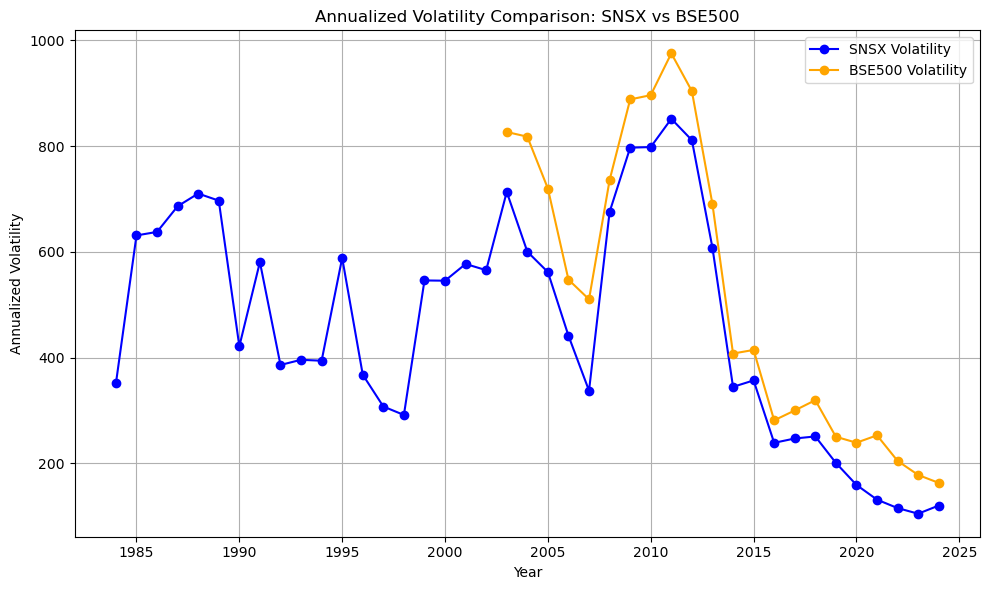

In [106]:
# Calculate annualized volatility (assuming 252 trading days per year)
snsx['Volatility'] = snsx['returns'].rolling(window=5).std() * (252 ** 0.5)
bse500['Volatility'] = bse500['returns'].rolling(window=5).std() * (252 ** 0.5)

# Plotting volatility comparison
plt.figure(figsize=(10, 6))

plt.plot(snsx.index, snsx['Volatility'], marker='o', linestyle='-', color='blue', label='SNSX Volatility')
plt.plot(bse500.index, bse500['Volatility'], marker='o', linestyle='-', color='orange', label='BSE500 Volatility')

# Adding labels and title
plt.title('Annualized Volatility Comparison: SNSX vs BSE500')
plt.xlabel('Year')
plt.ylabel('Annualized Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
